### Problem Statement

#### Looking at company data from 2020, we will plot data to identify trends.



#### Loading packages and data

In [1]:
data <- read.csv("master_data2.csv")

In [22]:
glimpse(data)

Rows: 550
Columns: 11
$ UNIQUE_ID         <chr> "GSK01", "GSK02", "GSK03", "GSK04", "GSK05", "GSK06"~
$ PRODUCT_NAME      <chr> "A Masks", "N hand sanitizer,350 ml", "G Channa Dal,~
$ COMPANY           <chr> "A", "N", "G", "I", "S", "S", "S", "G", "Z", "A", "Z~
$ PRODUCT_TYPE      <chr> "hygiene", "hygiene", "foodgrains&spices", "Organic ~
$ PRODUCT_CATEGORY  <chr> "mask", "sanitizer", "pulses(dal)", "Dry Fruits", "b~
$ COST_PRICE        <dbl> 160.00, 248.00, 162.00, 77.14, 494.50, 445.05, 270.0~
$ SELLING_PRICE     <dbl> 200.000, 400.000, 180.000, 133.000, 593.400, 534.060~
$ QUANTITY_DEMANDED <int> 890, 800, 456, 100, 111, 111, 360, 52, 27, 353, 500,~
$ PROFIT            <dbl> 40.000, 152.000, 18.000, 55.860, 98.900, 89.010, 30.~
$ PROFIT_PERCENT    <dbl> 25.00000, 61.29032, 11.11111, 72.41379, 20.00000, 20~
$ NET_PROFIT        <dbl> 35600.00, 121600.00, 8208.00, 5586.00, 10977.90, 988~


In [3]:
require(dplyr)
require(ggplot2)

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2



#### Plotting Average Quantity and Product Type

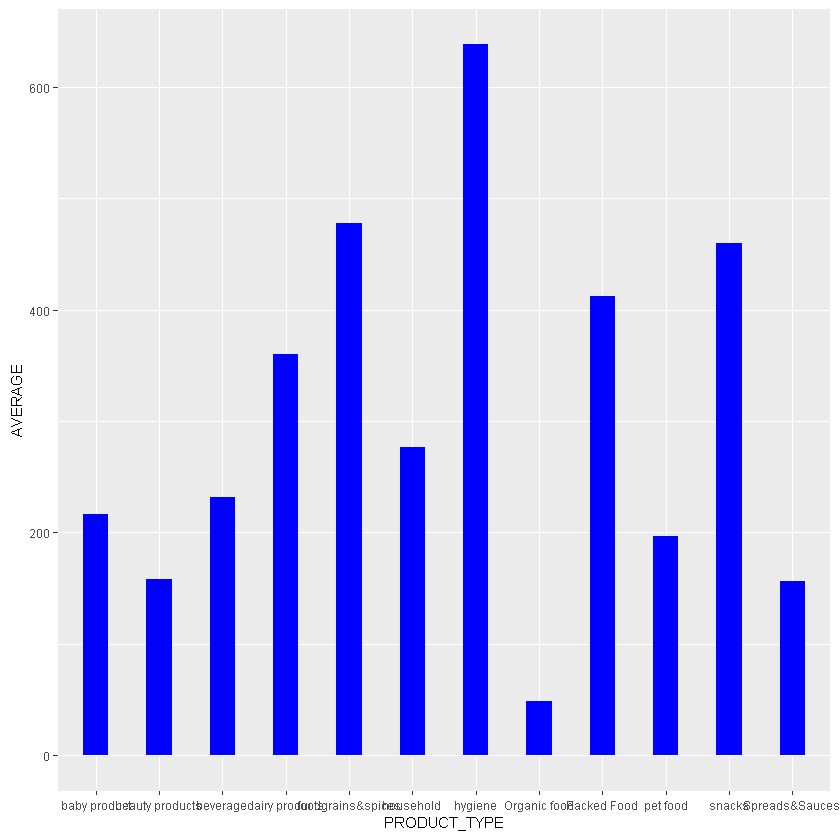

In [13]:
data %>% group_by(PRODUCT_TYPE) %>% 
summarise(AVERAGE=mean(QUANTITY_DEMANDED)) %>%
ggplot(aes(x=PRODUCT_TYPE, y=AVERAGE)) + 
geom_col(width=0.4, fill = "blue") + 
theme(text=element_text(size=9))

* Due to the COVID-19 situation, demand for the essential products has increased.

* Demand for nonessential items has decreased.

* Organic food is more costly, so we expect that basic food will be more in demand.

#### Plotting Average Net Profit and Product Type

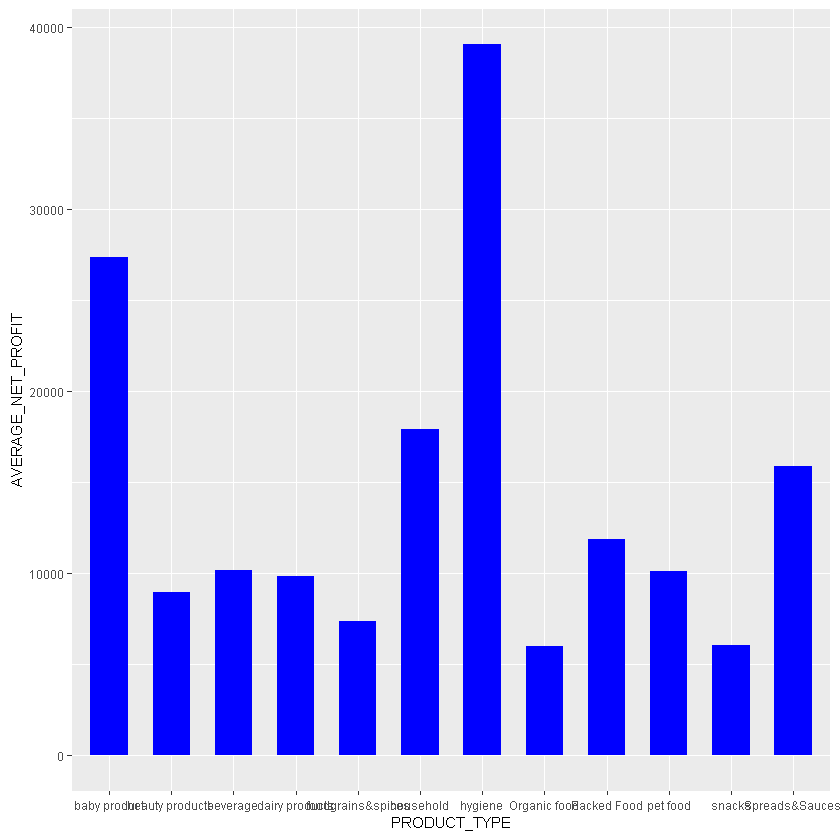

In [18]:
data %>% group_by(PRODUCT_TYPE) %>%
summarise(AVERAGE_NET_PROFIT=mean(NET_PROFIT)) %>%
ggplot(aes(x=PRODUCT_TYPE, y= AVERAGE_NET_PROFIT)) + geom_col(width=0.6, fill ="blue") + theme(text=element_text(size=9))



* Organic foods have a high profit margin but low demand, hence low overall net profit. 
* Hygene products, and baby products  have constant demand and have high margin, hence high net profit. 

#### Plotting Net Profit and Company

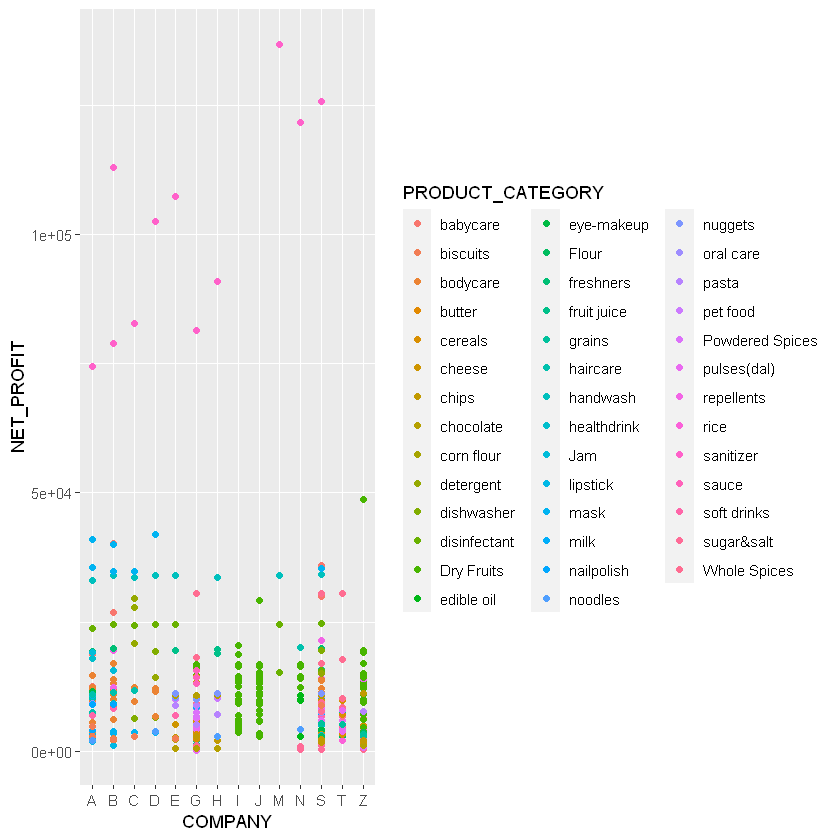

In [19]:
data %>% 
ggplot(aes(x=COMPANY, y=NET_PROFIT, color = PRODUCT_CATEGORY)) + geom_point()

* Essential food items, and masks show larger net profit than anything else for every company. 

#### Plotting Profit, Quantity Demanded for beauty products

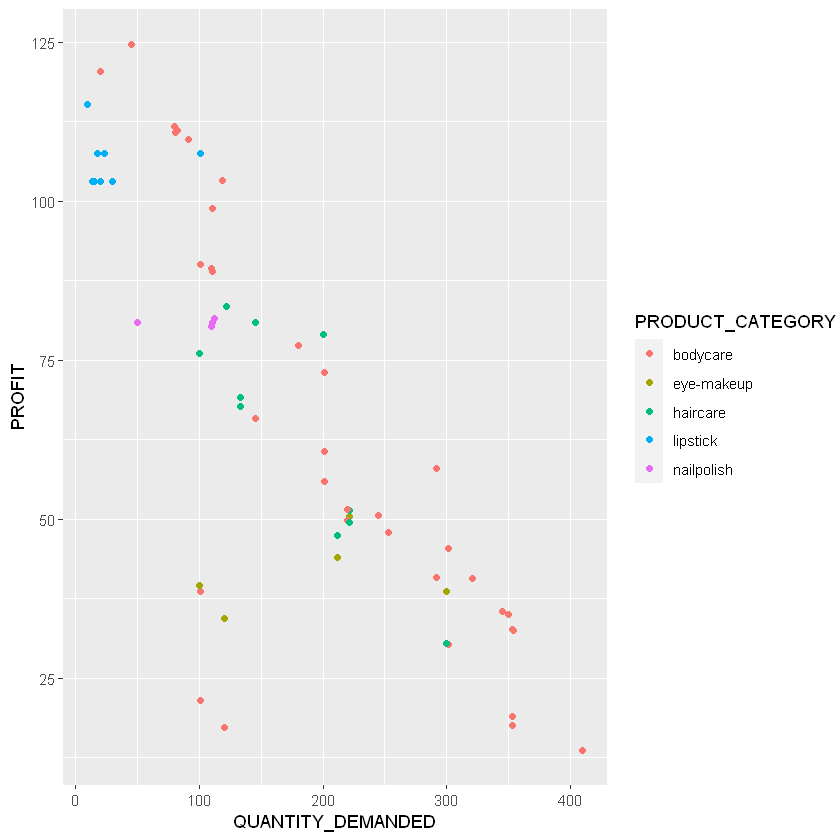

In [21]:
data %>% 
filter(PRODUCT_TYPE == "beauty products") %>%
ggplot(aes(x=QUANTITY_DEMANDED, y=PROFIT, color = PRODUCT_CATEGORY)) + geom_point()

* Demand for lipstick dropped drastically. 
* More demand for eye care, body care products.

#### Plotting Average Selling Price and Quantity Demanded

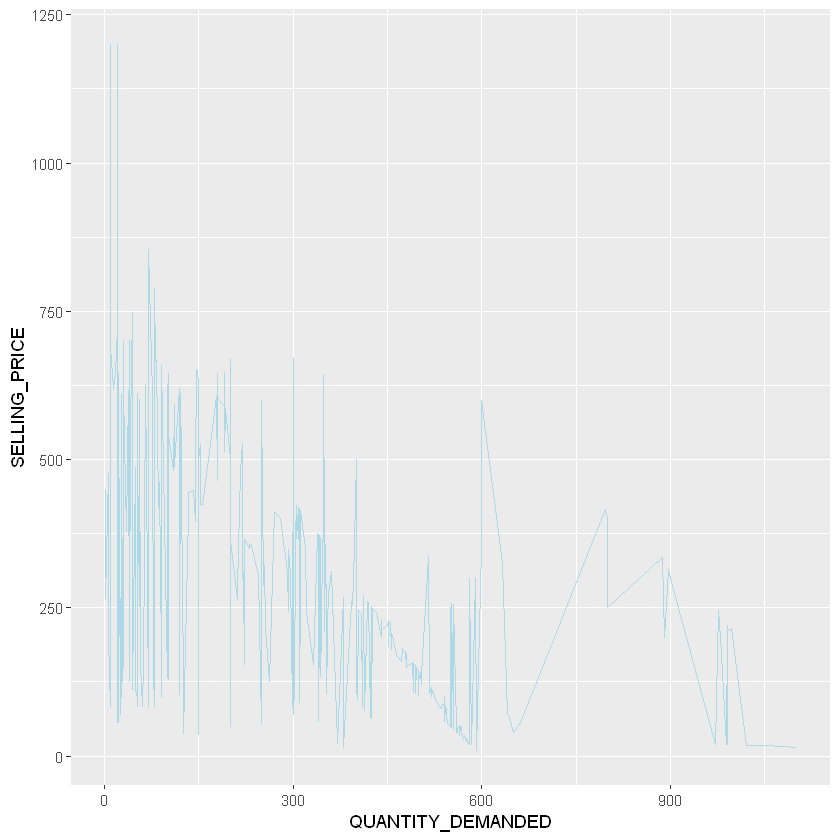

In [28]:
data %>% 
ggplot(aes(x=QUANTITY_DEMANDED, y= SELLING_PRICE)) + geom_line(color = "light blue")

* Displays inverse relationship between demand and selling price.

#### Plotting Average Net Profit and Company

`summarise()` has grouped output by 'PRODUCT_TYPE'. You can override using the
`.groups` argument.


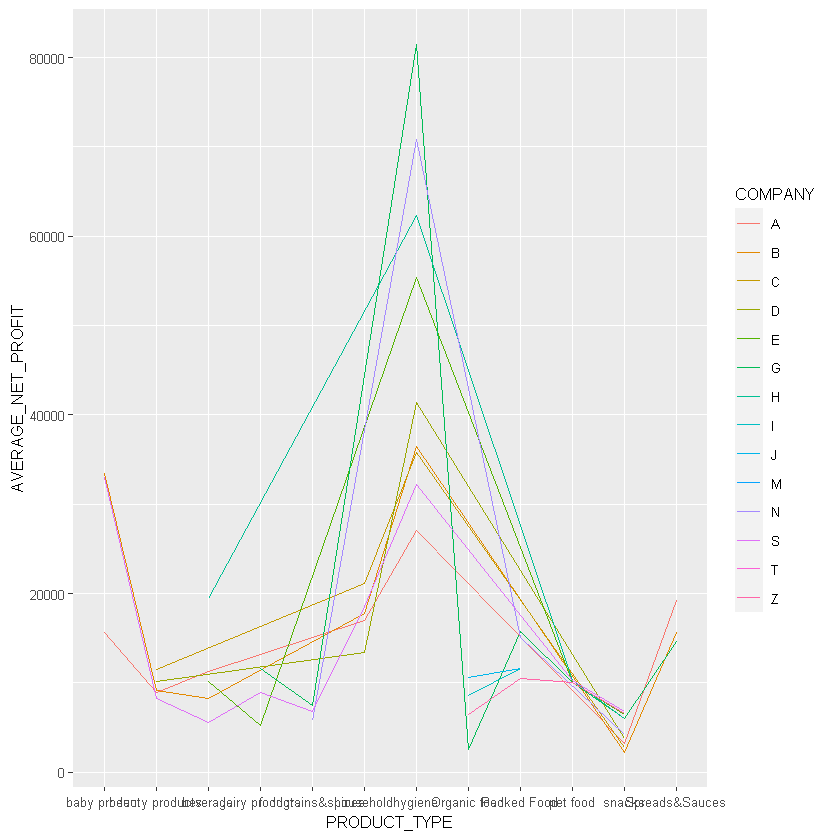

In [29]:
data %>%
group_by(PRODUCT_TYPE, COMPANY) %>%
summarise(AVERAGE_NET_PROFIT=mean(NET_PROFIT,na.rm = TRUE)) %>%
ggplot(aes(x=PRODUCT_TYPE,y=AVERAGE_NET_PROFIT, group=COMPANY, color= COMPANY)) +
geom_line() + theme(text=element_text(size=9.5))

* Due to the pandemic, companys have switched their resources to producing hygene products, which have very high demand and margin. 

* Companys that have a wide variety of goods show the largest share of profit from hygiene goods. 

#### Profit Margin for Product Category

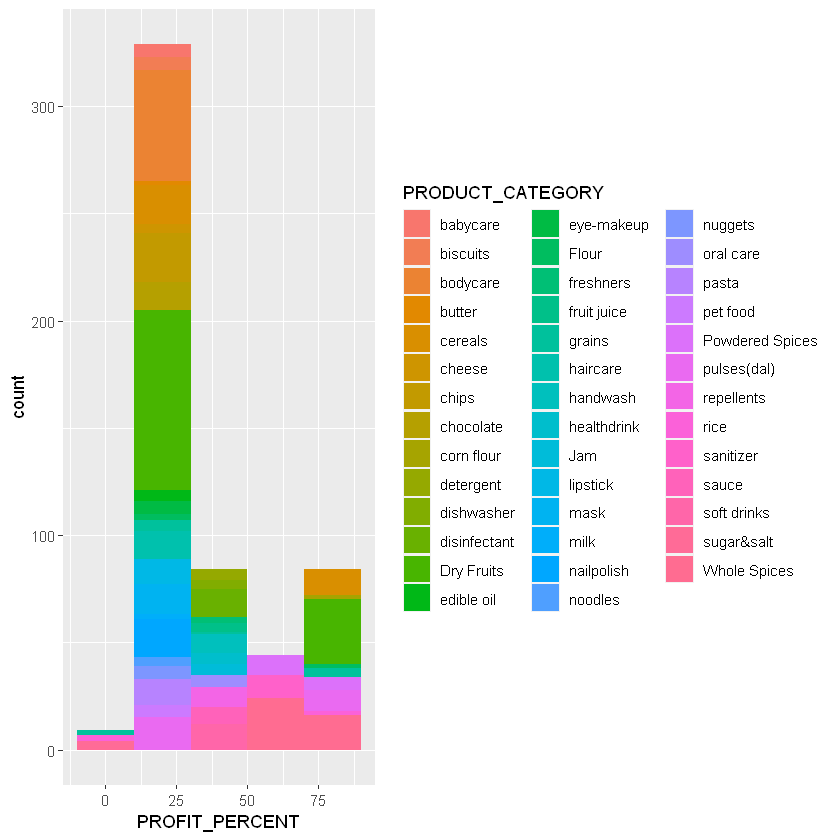

In [32]:
data %>%
ggplot(aes(x=PROFIT_PERCENT, fill =PRODUCT_CATEGORY)) + geom_histogram(binwidth=20)

#### Quantity Demand for Snack Products

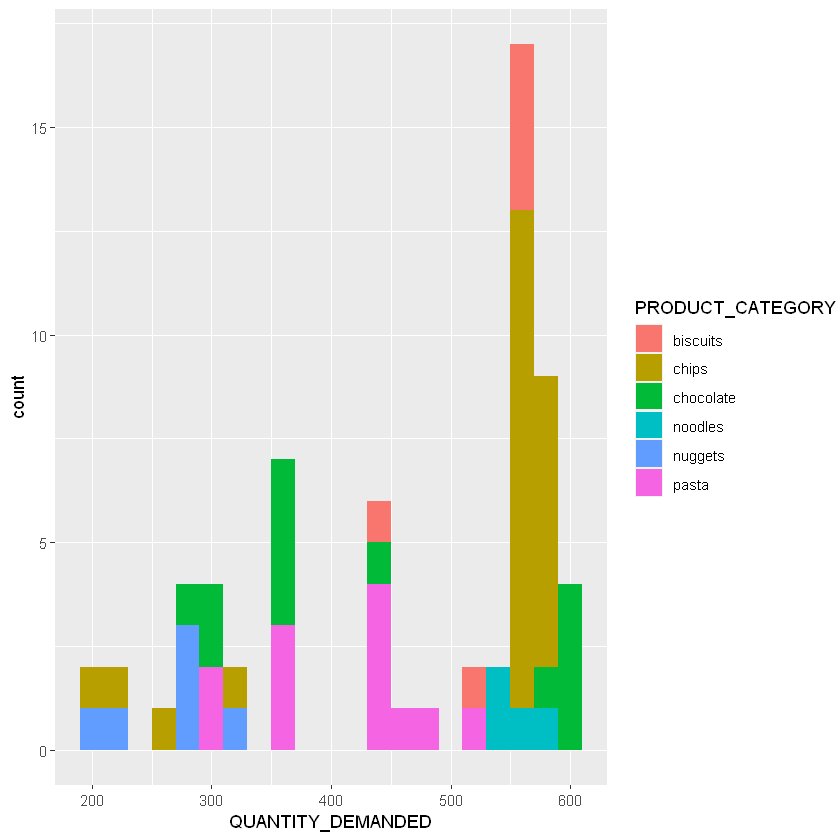

In [33]:
data %>%
filter(PRODUCT_TYPE == "snacks") %>%
ggplot(aes(x=QUANTITY_DEMANDED, fill =PRODUCT_CATEGORY)) + geom_histogram(binwidth=20)

* Chips, and biscuits, have a much higher demand than any other snack

#### Pie Chart for Hygiene Products Demand

In [79]:
temp <- data

In [80]:
temp2 <- temp %>%
filter(PRODUCT_TYPE == 'hygiene') %>%
group_by(PRODUCT_CATEGORY)  %>%
summarise(QUANTITY_DEMANDED=sum(QUANTITY_DEMANDED))

##### Calculating percentage of each product and plotting

In [86]:
chart_temp <- temp2 %>%
arrange(desc(PRODUCT_CATEGORY)) %>%
mutate(percentage=round(QUANTITY_DEMANDED)*100/ sum(QUANTITY_DEMANDED)) %>%
mutate(y_pos = cumsum(percentage)-0.5*percentage)


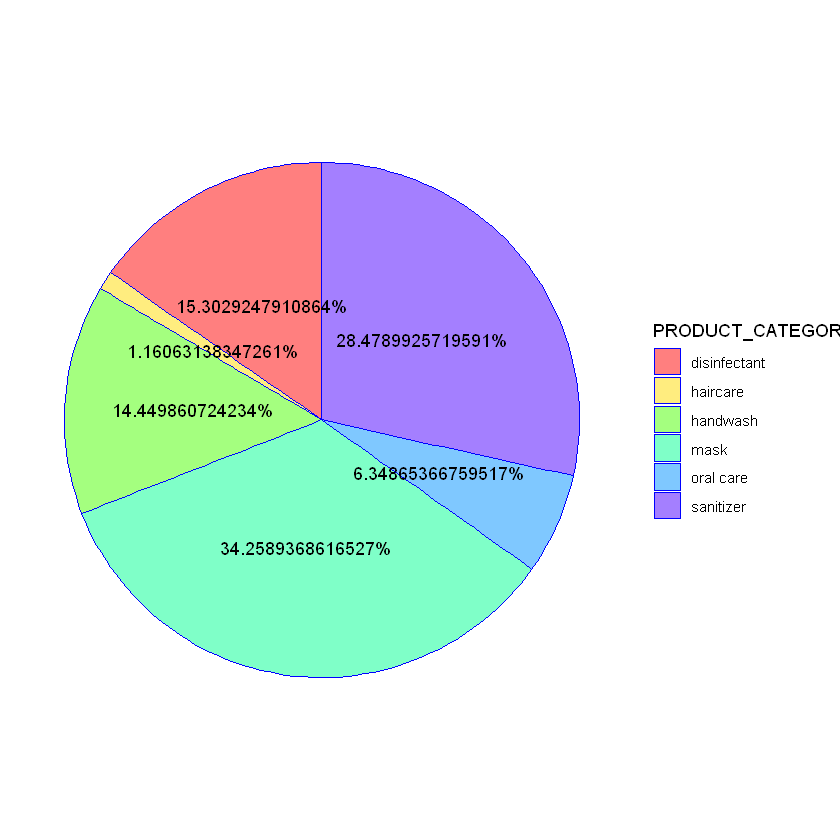

In [91]:
chart_temp %>% 
ggplot(aes(x="", percentage, fill=PRODUCT_CATEGORY)) +
geom_bar(width=1, stat="identity", color = "blue", alpha = .5) + 
coord_polar("y", start = 0) +
geom_text(aes(y=y_pos, label=paste0(percentage,"%")), color ="black") + 
scale_fill_manual(values = rainbow(7)) + theme_void()

#### Coxcomb Chart

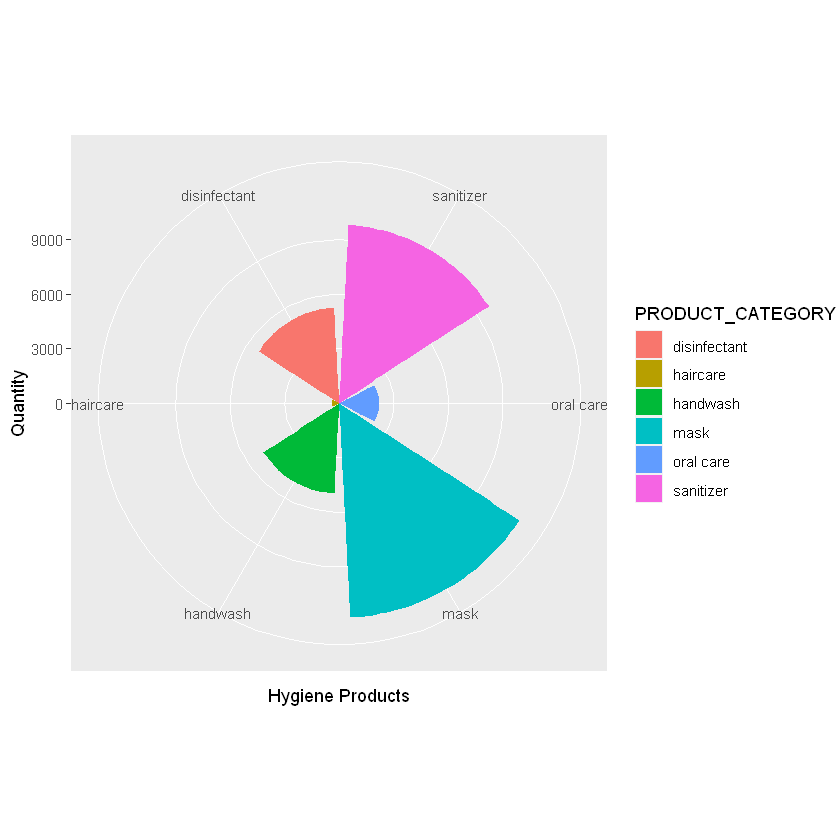

In [95]:
chart_temp %>%
ggplot(aes(PRODUCT_CATEGORY, QUANTITY_DEMANDED, fill = PRODUCT_CATEGORY)) +
geom_bar(stat="identity") +
coord_polar("x", start= 0, direction = -1) +
xlab("Hygiene Products") + 
ylab("Quantity")

* Sanitizer generating a very high demand, with masks. 
* Oral care products demand has decreased.